In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv

In [2]:
df = pd.read_csv('titanic_data.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
list(df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Objective of this Study

This dataset has the following categorical features:
* Survived: 1 = Yes, 0= No
* Pclass (Passenger Class): 1,2,3
* Sex: Male, Female
* Embarked (Port of Embarkation): C = Cherbourg, Q = Queenstown, S = Southampton


I have tried to understand the relationship among all the four categorical features

In [7]:
def make_pivot (param1, param2):
    df_slice = df[[param1, param2, 'PassengerId']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2],aggfunc=np.size, fill_value=0)
    
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    
    return slice_pivot
    return p_chart


### I have created a function, which given two parameters, creates a pivot table and a bar chart to show their relationship 


## 1) Relation between passengers' survival and booking class

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

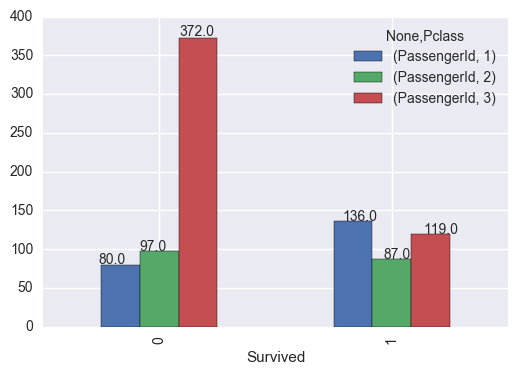

In [8]:
make_pivot ('Survived','Pclass')

## 2) Relation between passengers' survival and their sex

PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

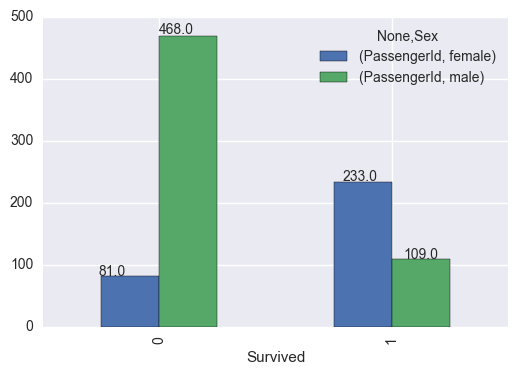

In [9]:
make_pivot ('Survived','Sex')

## 3) Relation between passengers' survival and port of embarkation

PassengerId         
Embarked           C   Q    S
Survived                     
0                 75  47  427
1                 93  30  217

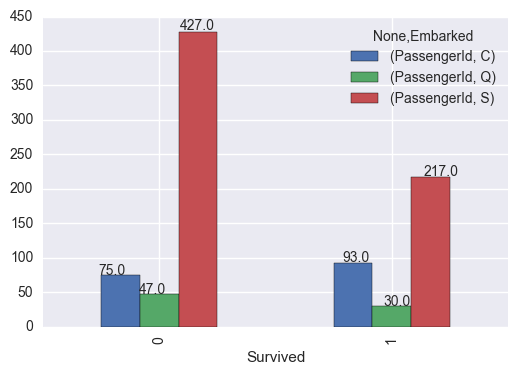

In [10]:
make_pivot ('Survived','Embarked')

## 4) Relation between passengers' booking class and their sex

PassengerId     
Sex         female male
Pclass                 
1               94  122
2               76  108
3              144  347

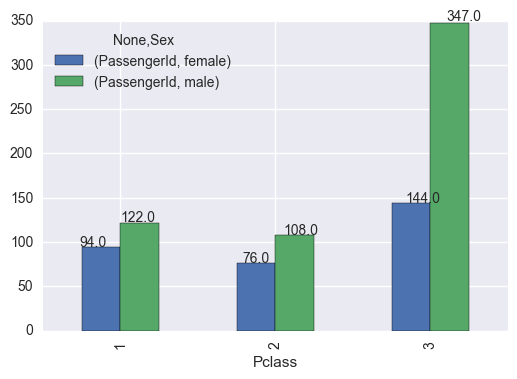

In [11]:
make_pivot ('Pclass','Sex')

## 5) Relation between passengers' booking class and port of embarkation

PassengerId         
Embarked           C   Q    S
Pclass                       
1                 85   2  127
2                 17   3  164
3                 66  72  353

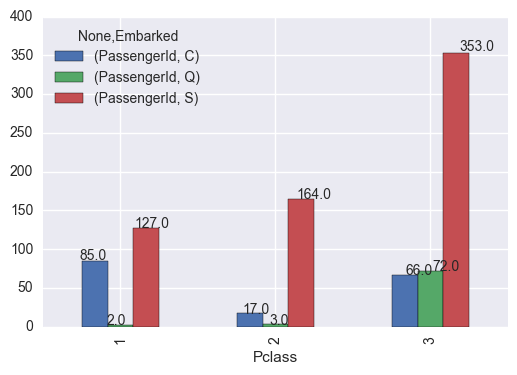

In [12]:
make_pivot ('Pclass','Embarked')

## 6) Relation between passengers' sex and port of embarkation

PassengerId         
Embarked           C   Q    S
Sex                          
female            73  36  203
male              95  41  441

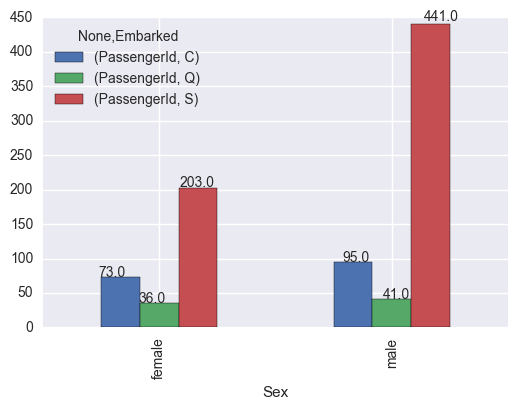

In [13]:
make_pivot ('Sex','Embarked')

_- Abhishek Chhibber_